In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [253]:
tweets = pd.read_csv('/Users/romanpeerboom/Documents/GitHub/SocialWebFinal/data/output/final_with_states_codes.csv')
vaccs = pd.read_csv('/Users/romanpeerboom/Documents/GitHub/SocialWebFinal/data/output/Vaccinations_us_first')
elections = pd.read_csv('/Users/romanpeerboom/Documents/CS/Social Web/Correlation_analysis/1976-2020-president.csv')##

##later nog kijken naar hoe sentiment zich ontwikkeld door de tijd

In [409]:
tweets_grouped = tweets.groupby(['State']).mean()

tweets_grouped = tweets_grouped.sort_values(by = ['score'])
tweets_grouped.reset_index(level=0, inplace=True)
tweets_grouped.loc[22, 'State'] = 'DC'
states = tweets_grouped['State'].tolist()

In [410]:
low_states = states[:10]
high_states = states[-10:]
low_states


['MT', 'KS', 'LA', 'NY', 'MD', 'OR', 'AR', 'NV', 'SD', 'IA']

In [411]:
low_states_vaccs = vaccs.loc[vaccs['Location'].isin(low_states)]
high_states_vaccs = vaccs.loc[vaccs['Location'].isin(high_states)]



In [412]:
dates = vaccs['Date'].unique().tolist()
dates.reverse()

In [413]:
statelist_low = [0]*len(dates)
for state in low_states:
    state_vac = vaccs.loc[vaccs['Location'] == state]
    for i in range(len(dates)):
        value = (state_vac.loc[state_vac['Date'] == dates[i]]['Admin_Per_100K'].iloc[0])
        statelist_low[i] += value
    print(statelist_low)

[1955, 9931, 26636, 49989, 71735, 81256, 88088, 91210, 95652, 101982, 111515, 124227]
[2497, 17719, 47950, 95001, 141632, 161194, 173616, 184227, 195855, 208140, 226742, 251630]
[3501, 27682, 71108, 138092, 199922, 227692, 246328, 263049, 286392, 305653, 331799, 364215]
[4676, 37591, 93497, 186379, 281442, 328997, 358652, 381268, 411967, 439118, 474064, 518563]
[5629, 46329, 116061, 234052, 361824, 430940, 472640, 500677, 537912, 571103, 615800, 675682]
[6547, 56373, 140341, 278950, 434077, 527755, 581155, 613300, 656034, 695467, 749814, 823101]
[7791, 66686, 162263, 319044, 493849, 596721, 655402, 694669, 749128, 795816, 857933, 940315]
[8745, 74762, 185480, 363659, 561233, 678350, 745782, 791250, 853469, 906309, 976764, 1069326]
[11669, 86934, 217365, 420752, 641575, 766093, 838555, 887517, 955789, 1014914, 1093055, 1199830]
[13289, 95094, 240656, 470447, 717927, 856452, 934887, 987081, 1060733, 1124805, 1211295, 1333400]


In [414]:
dates

['01/01/2021',
 '02/01/2021',
 '03/01/2021',
 '04/01/2021',
 '05/01/2021',
 '06/01/2021',
 '07/01/2021',
 '08/01/2021',
 '09/01/2021',
 '10/01/2021',
 '11/01/2021',
 '12/01/2021']

In [415]:
statelist_high = [0]*len(dates)
for state in high_states:
    state_vac = vaccs.loc[vaccs['Location'] == state]
    for i in range(len(dates)):
        value = (state_vac.loc[state_vac['Date'] == dates[i]]['Admin_Per_100K'].iloc[0])
        statelist_high[i] += value
    print(statelist_high)

[1769, 9594, 27520, 50696, 87566, 112453, 118670, 121545, 126147, 132941, 139983, 147230]
[3678, 22195, 56446, 106593, 179125, 225897, 242478, 250562, 261875, 274716, 292696, 315923]
[5934, 38875, 93136, 162848, 255766, 309650, 332730, 345909, 361903, 383389, 412708, 447134]
[6928, 47863, 114827, 205412, 319343, 383081, 414276, 431796, 455648, 485896, 524314, 567754]
[8944, 58708, 139675, 258606, 408655, 493277, 534439, 555789, 585502, 622055, 670956, 734520]
[11909, 73234, 169475, 308624, 474641, 566788, 613698, 638810, 670047, 708736, 759729, 828894]
[13016, 82571, 192978, 354168, 546753, 654420, 712000, 744160, 786342, 833694, 893179, 973309]
[14661, 92813, 217513, 401853, 625005, 752064, 819724, 856755, 905085, 958543, 1028260, 1123399]
[17189, 105867, 248821, 456899, 699211, 832709, 904115, 943970, 996656, 1056286, 1134706, 1241415]
[18374, 116013, 275903, 503590, 761106, 901068, 977244, 1021307, 1079338, 1146291, 1233057, 1351138]


In [416]:
states_high = [0]*len(dates)
for state in states:
    state_vac = vaccs.loc[vaccs['Location'] == state]
    for i in range(len(dates)):
        value = (state_vac.loc[state_vac['Date'] == dates[i]]['Admin_Per_100K'].iloc[0])
        states_high[i] += value


In [417]:
statelist_high = [element /10  for element in statelist_high]
states_high = [element /51 for element in states_high]
statelist_low = [element /10 for element in statelist_low]
print(len(high_states))

10


In [418]:
dates_graph = ['01/21',
 '02/21',
 '03/21',
 '04/21',
 '05/21',
 '06/21',
 '07/21',
 '08/21',
 '09/21',
 '10/21',
 '11/21',
 '12/21']

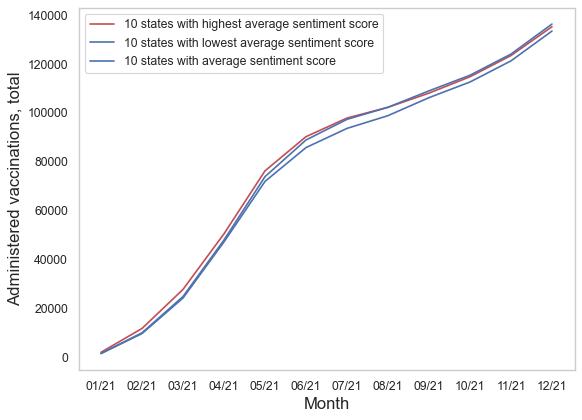

In [419]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(dates_graph, statelist_high, color = 'r', label = '10 states with highest average sentiment score')
plt.plot(dates_graph, statelist_low, color = 'b', label = '10 states with lowest average sentiment score')

plt.plot(dates_graph, states_high, label = '10 states with average sentiment score')
plt.xlabel('Month', size = '15')
plt.ylabel('Administered vaccinations, total', size = '15')
plt.grid()
plt.legend()




In [346]:
elections = elections.loc[elections['year'] == 2020]
elections_dem  = elections.loc[elections['party_detailed'] == 'DEMOCRAT']
elections_rep  = elections.loc[elections['party_detailed'] == 'REPUBLICAN']
elections_dem.reset_index(level=0, inplace=True)
elections_rep.reset_index(level=0, inplace=True)
elect_results = pd.DataFrame()
elect_results['State'] = states
elect_results['Winner'] = 'DEM'
elect_results['Prc_dem'] = 0


In [347]:
for i in range(len(states)):
    if elections_dem.loc[i, 'candidatevotes'] < elections_rep.loc[i, 'candidatevotes']:
        elect_results.loc[i, 'Winner'] = 'REP'
    elect_results.loc[i, 'Prc_dem'] = elections_dem.loc[i, 'candidatevotes']/ elections_dem.loc[i, 'totalvotes']

In [348]:
high_states

['HI', 'CT', 'AK', 'SC', 'ME', 'WV', 'FL', 'CO', 'ND', 'WY']

In [349]:
high_score = 0
for state in high_states:
    state_elect = elect_results.loc[elect_results['State'] == state]
    high_score += float(state_elect['Prc_dem'])

In [350]:
low_score = 0
for state in low_states:
    state_elect = elect_results.loc[elect_results['State'] == state]
    low_score += float(state_elect['Prc_dem'])
    

In [351]:
print(high_score/10)
print(low_score/10)

0.44025126843387924
0.5399915910412256


In [388]:
dataframe = pd.DataFrame()
dataframe['state'] = ['Highest', 'Highest', 'Lowest', 'Lowest']
dataframe['5/10'] = ['5', '10', '5', '10']
dataframe['democrats'] = [43.52, 44.03, 45.39, 54]
dataframe

,state,5/10,democrats
0,Highest,5,43.52
1,Highest,10,44.03
2,Lowest,5,45.39
3,Lowest,10,54.00


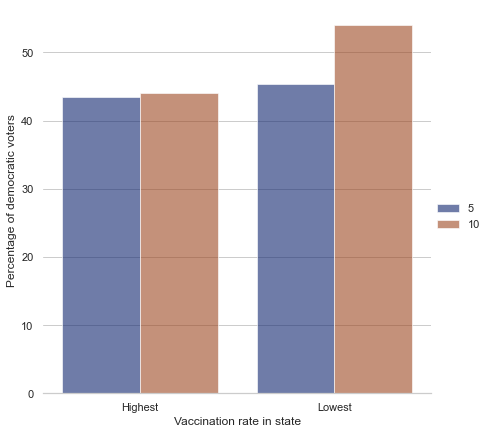

In [389]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=dataframe, kind="bar",
    x="state", y="democrats", hue="5/10",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Vaccination rate in state", "Percentage of democratic voters")
g.legend.set_title("")

In [375]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


,state,5/10,democrats
0,high,5,43.52
1,high,10,44.03
2,low,5,45.39
3,low,10,54.00


In [318]:
tweets_high = tweets.loc[tweets['State'].isin(high_states)]
tweets_high.reset_index(level=0, inplace=True)

<ipython-input-319-dbd880c44132>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_high['month'] = np.nan
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


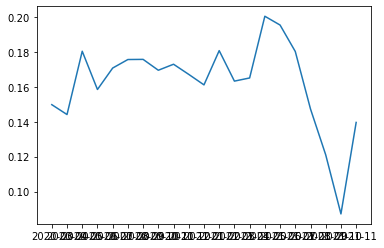

In [319]:
tweets_high['month'] = np.nan
for i in range(len(tweets_high)):
    tweets_high.loc[i, 'month'] = tweets_high.loc[i, 'date'][:7]

tweets_month_high = tweets_high.groupby(['month']).mean()
#tweets_month = tweets_month.sort_values(by = ['score'])
tweets_month_high.reset_index(level=0, inplace=True)
plt.plot(tweets_month_high['month'][:-1], tweets_month_high['score'].tolist()[:-1])


In [320]:
tweets_low = tweets.loc[tweets['State'].isin(low_states)]
tweets_low.reset_index(level=0, inplace=True)

<ipython-input-321-d64103b24489>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_low['month'] = np.nan
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


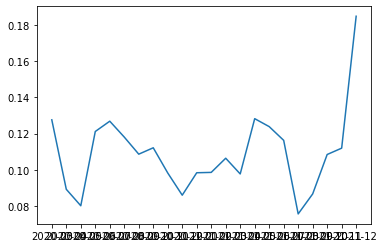

In [321]:
tweets_low['month'] = np.nan
for i in range(len(tweets_low)):
    tweets_low.loc[i, 'month'] = tweets_low.loc[i, 'date'][:7]

tweets_month_low = tweets_low.groupby(['month']).mean()
#tweets_month = tweets_month.sort_values(by = ['score'])
tweets_month_low.reset_index(level=0, inplace=True)
plt.plot(tweets_month_low['month'], tweets_month_low['score'].tolist())

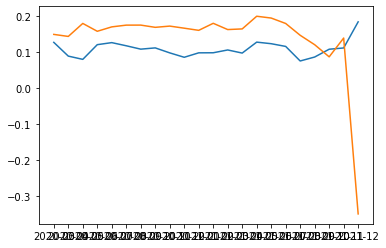

In [352]:
plt.plot(tweets_month_low['month'], tweets_month_low['score'].tolist())
plt.plot(tweets_month_high['month'], tweets_month_high['score'].tolist())


In [364]:
tweets_high = tweets_month_high['score'][:-1]
tweets_low = tweets_month_low['score'][:-1]
print(tweets_month_low['month'][:-1])


0     2020-03
1     2020-04
2     2020-05
3     2020-06
4     2020-07
5     2020-08
6     2020-09
7     2020-10
8     2020-11
9     2020-12
10    2021-01
11    2021-02
12    2021-03
13    2021-04
14    2021-05
15    2021-06
16    2021-07
17    2021-08
18    2021-09
19    2021-10
20    2021-11
Name: month, dtype: object


In [368]:
tweets_dates = ['03/20',
 '04/20',
 '05/20',
 '06/20',
 '07/20',
 '08/20',
 '09/20',
 '10/20',
 '11/20',
 '12/20',
 '01/21',
 '02/21',
 '03/21',
 '04/21',
 '05/21',
 '06/21',
 '07/21',
 '08/21',
 '09/21',
 '10/21',
 '11/21']

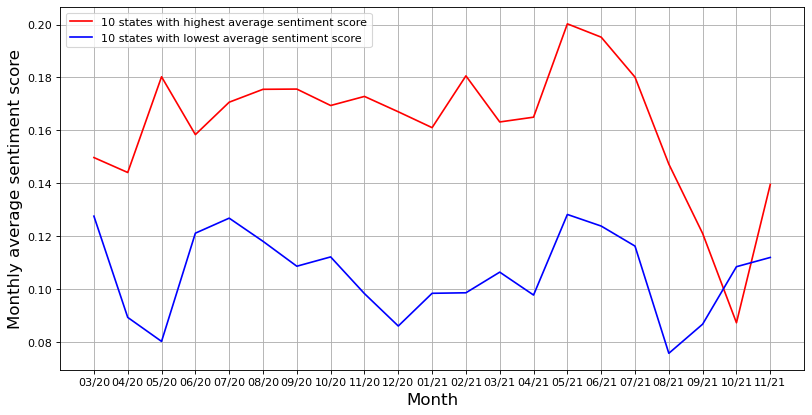

In [373]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(tweets_dates, tweets_high, color = 'r', label = '10 states with highest average sentiment score')
plt.plot(tweets_dates, tweets_low, color = 'b', label = '10 states with lowest average sentiment score')
plt.xlabel('Month', size = '15')
plt.ylabel('Monthly average sentiment score', size = '15')
plt.grid()
plt.legend()





In [272]:
vaccs_month_avg = vaccs.groupby(['Date']).mean()['Admin_Per_100K'].tolist()


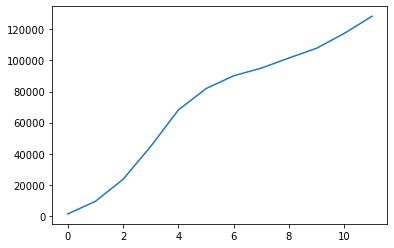

In [273]:
plt.plot(range(len(vaccs_month_avg)), vaccs_month_avg)
## per staat per maand -+ gemiddelde vd maand 

In [274]:
differences = [] 
for i in range(len(dates)):
    sum_vaccs = 0
    last_sum = 0
    df_date = vaccs.loc[vaccs['Date'] == dates[i]]
    for state in high_states:
        state_df = df_date.loc[df_date['Location'] == state]
        sum_vaccs += float(state_df['Admin_Per_100K'])
        increase = sum_vaccs - last_sum
        last_sum = sum_vaccs
    if i == 0:
        differences.append((increase/5) - vaccs_month_avg[i])
    else:
        differences.append((increase/5) - vaccs_month_avg[i] + vaccs_month_avg[i-1])
    
        

[-1021.4615384615386, -6014.200000000001, -8768.076923076924, -11820.999999999996, -11092.307692307695, -94.5384615384537, 6394.0, 10512.030769230769, 10024.90769230768, 11699.24615384615, 10121.175000000003, 10936.646875000006]


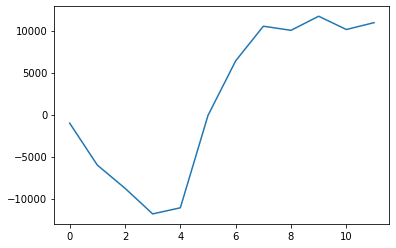

In [275]:
print(differences)
plt.plot(range(len(differences)), differences)

In [390]:
high_states


['HI', 'CT', 'AK', 'SC', 'ME', 'WV', 'FL', 'CO', 'ND', 'WY']